# Testing pandas and matplotlib with Pitchfork Album Reviews

In this notebook I will import Pitchfork data from a .csv in order to manipulate the data set and plot some stuff.

In [1]:
# First we import the required libraries to manipulate and visualize data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline

# We read the .csv file and make it a Data Frame. We glimpse at the head to ensure that it was read correctly.
df = pd.read_csv('p4kreviews.csv', index_col = 0)
df.head()

,album,artist,best,date,genre,review,score
1,A.M./Being There,Wilco,1,December 6 2017,Rock,Best new reissue 1 / 2 Albums Newly reissued a...,7.0
2,No Shame,Hopsin,0,December 6 2017,Rap,"On his corrosive fifth album, the rapper takes...",3.5
3,Material Control,Glassjaw,0,December 6 2017,Rock,"On their first album in 15 years, the Long Isl...",6.6
4,Weighing of the Heart,Nabihah Iqbal,0,December 6 2017,Pop/R&B,"On her debut LP, British producer Nabihah Iqba...",7.7
5,The Visitor,Neil Young / Promise of the Real,0,December 5 2017,Rock,"While still pointedly political, Neil Young�s ...",6.7


In [2]:
# What is the shape of the data frame?
print(df.shape)

(19555, 7)


In [3]:
# Info summary of the dataframe df.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19555 entries, 1 to 19555
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   album   19550 non-null  object 
 1   artist  19555 non-null  object 
 2   best    19555 non-null  int64  
 3   date    19555 non-null  object 
 4   genre   19555 non-null  object 
 5   review  19554 non-null  object 
 6   score   19555 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ MB


In [4]:
# What is the summarized description of the numerical data in df?
df.describe()

,best,score
count,19555.000000,19555.000000
mean,0.053183,7.027446
std,0.224405,1.277544
min,0.000000,0.000000
25%,0.000000,6.500000
50%,0.000000,7.300000
75%,0.000000,7.800000
max,1.000000,10.000000


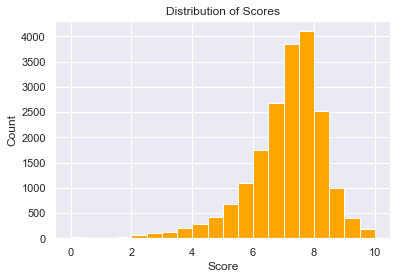

In [5]:
# Now we plot a histogram of the scores.
plt.hist(df.score, bins = 20, color =  'orange')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

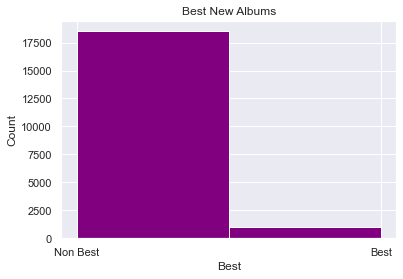

In [6]:
# Let's visualize the ratio of Best New Albums vs non-Best New Albums.
plt.hist(df.best, bins = 2, color = 'purple')
plt.title('Best New Albums')
plt.xlabel('Best')
plt.ylabel('Count')
plt.xticks(np.arange(2), ['Non Best', 'Best'])
plt.show()

In [7]:
# How many reviews are there by genre? 
df_genre = df
df_genre['count'] = 1
df_genre.groupby(['genre']).count().sort_values('count', ascending = False)['count']

genre
Rock            6958
Electronic      4020
None            2324
Experimental    1699
Rap             1481
Pop/R&B         1157
Metal            781
Folk/Country     700
Jazz             257
Global           178
Name: count, dtype: int64

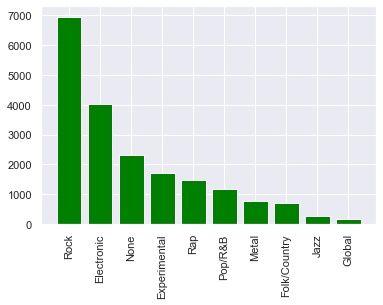

In [8]:
# Reviews by genre visualization

counts = df['genre'].value_counts()
plt.bar(range(len(counts)), counts, color = 'green')
plt.xticks(range(len(counts)), counts.index, rotation = 90)
plt.show()

In [9]:
# What is the average album score by genre?

df_score_by_genre = df.groupby(['genre'])['score'].mean()
df_score_by_genre

genre
Electronic      6.941318
Experimental    7.359035
Folk/Country    7.219857
Global          7.434831
Jazz            7.568482
Metal           6.980410
None            7.020611
Pop/R&B         6.948315
Rap             6.950304
Rock            6.983616
Name: score, dtype: float64

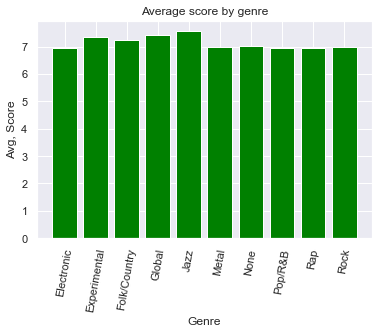

In [10]:
# Average score by genre visualization (WIP)
genres = [genre for genre, df in df.groupby('genre')]

plt.bar(genres, df_score_by_genre, color = 'green')
plt.title('Average score by genre')
plt.xlabel('Genre')
plt.ylabel('Avg, Score')
plt.xticks(rotation = 80)
plt.show()

The three genres with the highest average scores are Jazz, Global and Experimental in that order.

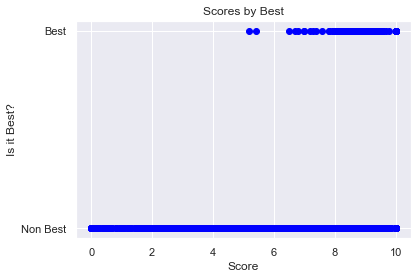

In [11]:
# Relation between Best New Music and Score?
plt.scatter(df.score, df.best, color = 'blue')
plt.title('Scores by Best')
plt.xlabel('Score')
plt.ylabel('Is it Best?')
plt.yticks(np.arange(2), ['Non Best', 'Best'])
plt.show()

Interestingly, there are albums with a score of 10 that are *not* Best New Music, and there are Best New Music albums with a score of about 5. 

The first case must have seen a bunch of great music released at the same time, and the second case must have been a pretty shitty time for music.

In [12]:
# Filtering the data frame to only get reviews of Experimental or None genres.
filterExperimentalNone = np.logical_or(df['genre'] == 'Experimental', df['genre'] == 'None')

ExperimentalNone_df = df[filterExperimentalNone].reset_index()
ExperimentalNone_df

,index,album,artist,best,date,genre,review,score,count
0,21,Call Me By Your Name (Original Motion Picture ...,Various Artists,0,December 1 2017,None,The soundtrack to Italian director Luca Guadag...,7.6,1
1,24,Rainbow Mirror,Prurient,0,November 30 2017,Experimental,"Commemorating 20 years of his Prurient alias, ...",6.2,1
2,46,Bill Brewster Presents Tribal Rites,Bill Brewster,0,November 21 2017,None,"A sort of biography in compilation form, Triba...",7.8,1
3,47,FILM,Qasim Naqvi,0,November 21 2017,Experimental,"Originally composed for a pair of soundtracks,...",7.7,1
4,49,Bajas Fresh,Bitchin Bajas,0,November 20 2017,Experimental,"Over seven tracks that span 80 minutes, the ex...",8.0,1
...,...,...,...,...,...,...,...,...,...
4018,19527,Ohia: Axxess and Ace,Songs,0,March 15 1999,None,More melancholy acoustic ballads-- who needs '...,8.0,1
4019,19530,Singles 1989-1991,The Wedding Present,0,March 9 1999,Experimental,"Less really is more. Take the Wedding Present,...",5.5,1
4020,19543,The Sebadoh,Sebadoh,0,February 23 1999,Experimental,There's nothing more American than marijuana a...,7.4,1
4021,19553,"Singles Breaking Up, Vol. 1",Don Caballero,0,January 12 1999,Experimental,"Well, kids, I just went back and re-read my re...",7.2,1


In [13]:
#Out of curiosity, I sorted by descending score to see what were the best rated Experimental and no genre albums.
ExperimentalNone_df.sort_values('score', ascending = False)

,index,album,artist,best,date,genre,review,score,count
3490,17066,The Ascension,Glenn Branca,0,June 19 2003,Experimental,I was teaching the Dwight highschoolers how to...,10.0,1
1913,9261,Ladies and Gentlemen We are Floating in Space ...,Spiritualized,1,March 2 2010,Experimental,"Best new reissue This new deluxe, limited prod...",10.0,1
1550,7146,Tago Mago [40th Anniversary Edition],Can,0,December 9 2011,Experimental,"Can's 1971 album Tago Mago, freshly reissued i...",10.0,1
215,1542,Another Green World,Brian Eno,0,September 18 2016,Experimental,Brian Eno has done everything�from producing h...,10.0,1
3748,18164,This Year's Model,Elvis Costello & The Attractions,0,May 9 2002,None,Anyone can whine. But as a seemingly infinite ...,10.0,1
...,...,...,...,...,...,...,...,...,...
3665,17805,Children of the Black Sun,Non,0,September 19 2002,Experimental,"Boyd Rice, that provocative Gnostic, desperate...",0.5,1
3908,18791,Weird Revolution,Butthole Surfers,0,August 31 2001,None,Hotshot rock album mixers hold an interesting ...,0.4,1
4016,19503,Uterus and Fire,Old Time Relijun,0,April 20 1999,Experimental,I'd say Old Time Relijun's Uterus and Fire is ...,0.3,1
2143,10572,Johnny Cash Remixed,Various Artists,0,January 20 2009,None,Totally inessential. I've been scouring the bo...,0.2,1


In [14]:
# Let's separate the date by month, day and year.

df['Month'] = df['date'].apply(lambda x: x.split(' ')[0])
df['Day'] = df['date'].apply(lambda x: x.split(' ')[1])
df['Year'] = df['date'].apply(lambda x: x.split(' ')[2])
df

,album,artist,best,date,genre,review,score,count,Month,Day,Year
1,A.M./Being There,Wilco,1,December 6 2017,Rock,Best new reissue 1 / 2 Albums Newly reissued a...,7.0,1,December,6,2017
2,No Shame,Hopsin,0,December 6 2017,Rap,"On his corrosive fifth album, the rapper takes...",3.5,1,December,6,2017
3,Material Control,Glassjaw,0,December 6 2017,Rock,"On their first album in 15 years, the Long Isl...",6.6,1,December,6,2017
4,Weighing of the Heart,Nabihah Iqbal,0,December 6 2017,Pop/R&B,"On her debut LP, British producer Nabihah Iqba...",7.7,1,December,6,2017
5,The Visitor,Neil Young / Promise of the Real,0,December 5 2017,Rock,"While still pointedly political, Neil Young�s ...",6.7,1,December,5,2017
...,...,...,...,...,...,...,...,...,...,...,...
19551,1999,Cassius,0,January 26 1999,Electronic,"Well, it's been two weeks now, and I guess it'...",4.8,1,January,26,1999
19552,Let Us Replay!,Coldcut,0,January 26 1999,Electronic,The marketing guys of yer average modern megac...,8.9,1,January,26,1999
19553,"Singles Breaking Up, Vol. 1",Don Caballero,0,January 12 1999,Experimental,"Well, kids, I just went back and re-read my re...",7.2,1,January,12,1999
19554,Out of Tune,Mojave 3,0,January 12 1999,Rock,"Out of Tune is a Steve Martin album. Yes, I'll...",6.3,1,January,12,1999


In [15]:
# What was the number of reviews released each year?

count_by_year = df['Year'].value_counts()
count_by_year

2016    1261
2007    1216
2017    1203
2013    1200
2008    1199
2005    1185
2006    1185
2012    1183
2011    1163
2010    1161
2014    1160
2009    1159
2015    1135
2004    1121
2003    1060
2002     927
2001     467
2000     348
1999     222
Name: Year, dtype: int64

## Question 1: In 2009, which albums had a rating of over 9.0?

2009 is my favorite year in modern music because of albums like Bitte Orca, Merriweather Post Pavilion, Logos and Veckatimest. Let's see if any made the list.

In [16]:
# First we filter the reviews by the year 2009.
df2009 = df[df['Year'] == '2009'].reset_index()
df2009

,index,album,artist,best,date,genre,review,score,count,Month,Day,Year
0,9467,Fire in My Bones: Raw + Rare + Otherworldly Af...,Various Artists,0,December 11 2009,None,This gospel�set covers a wide range of approac...,8.4,1,December,11,2009
1,9468,Xenophanes,Omar Rodriguez-L�pez,0,December 11 2009,Rock,The latest in a large run of 2009 solo records...,5.7,1,December,11,2009
2,9469,Echo Kid,Turbo Fruits,0,December 11 2009,Electronic,"Once a Be Your Own Pet side project, Turbo Fru...",6.4,1,December,11,2009
3,9470,Klang,The Rakes,0,December 11 2009,Electronic,The UK indie band returns to the spirit and en...,6.1,1,December,11,2009
4,9471,Neil Young / Everybody Knows This Is Nowhere /...,Neil Young,1,December 11 2009,Rock,Best new reissue Best new reissue Best new rei...,7.8,1,December,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,10621,Theater of the Mind,Ludacris,0,January 5 2009,Rap,"Following his 2007 mixtape with DJ Drama, The ...",5.3,1,January,5,2009
1155,10622,Luna,The Aliens,0,January 5 2009,Rock,Three ex-members of the much-missed Beta Band ...,5.6,1,January,5,2009
1156,10623,Friendly Fires,Friendly Fires,0,January 5 2009,Electronic,This English indie-dance trio's debut shows an...,7.9,1,January,5,2009
1157,10624,Zang Tumb Tuum: The ZTT Box Set,Various Artists,0,January 5 2009,None,This 25-year anniversary celebration of Trevor...,5.1,1,January,5,2009


In [21]:
top_2009 = df2009[(df2009['artist'] != 'The Beatles') & (df2009['score'] >= 9.0)].sort_values(by='score', ascending = False).reset_index()
#Since the The Beatles remasters were released in 2009, we'll filter out The Beatles to get the actual 2009 albums.
#P.D. The Beatles are legends.
top_2009

,level_0,index,album,artist,best,date,genre,review,score,count,Month,Day,Year
0,317,9784,The Stone Roses,The Stone Roses,1,September 11 2009,Rock,Best new reissue A badly needed remaster of th...,10.0,1,September,11,2009
1,1022,10489,Paul's Boutique,Beastie Boys,1,February 13 2009,Rap,Best new reissue The Beastie Boys' landmark se...,10.0,1,February,13,2009
2,881,10348,Histoire de Melody Nelson,Serge Gainsbourg,1,March 26 2009,Pop/R&B,"Best new reissue Almost unbelievably, the Fren...",10.0,1,March,26,2009
3,538,10005,Reckoning [Deluxe Edition],R.E.M.,1,July 2 2009,Rock,Best new reissue The expanded reissues of albu...,10.0,1,July,2,2009
4,378,9845,Kid A: Special Collectors Edition,Radiohead,1,August 25 2009,Rock,Best new reissue Capitol follows its excavatio...,10.0,1,August,25,2009
5,1158,10625,Merriweather Post Pavilion,Animal Collective,1,January 5 2009,Experimental,Best new music With their constantly evolving ...,9.6,1,January,5,2009
6,373,9840,Amnesiac: Special Collectors Edition,Radiohead,1,August 26 2009,Rock,Best new reissue Met with confusion back in 20...,9.5,1,August,26,2009
7,44,9511,The Catalogue,Kraftwerk,1,December 1 2009,Electronic,Best new reissue Long-awaited box from one of ...,9.5,1,December,1,2009
8,443,9910,Midlife: A Beginner's Guide to Blur,Blur,1,July 30 2009,Rock,Best new reissue A new comp from a band whose ...,9.4,1,July,30,2009
9,291,9758,Keep an Eye on the Sky,Big Star,1,September 18 2009,Rock,"Best new reissue Combining studio tracks, live...",9.3,1,September,18,2009


We can identify that 24 albums had a score above 9.0 in 2009. Among my favorites are *Veckatimest* by Grizzly Bear, *Embryonic* by Flaming Lips, *Bitte Orca* by Dirty Projectors and *Merriweather Post Pavilion* by Animal Collective.